<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="http://qworld.lu.lv" target="_blank"><img src="..\images\qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Arda Çınar and Özlem Salehi (<a href="http://qworld.lu.lv/index.php/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $

<h1> <font color="blue"> Solutions for </font> Deutsch-Jozsa Algorithm </h1> 

<a id="task3"></a>
<h3> Task 3 (Discussion)</h3> 

- How many times do we need to use the oracle f, if we want to solve this problem clasically, in the worst case?

- How many times do you think we will use the oracle f while solving it with a quantum computer?

<h3>Solution</h3>

- We need to make at least $\frac{2^n}{2} + 1$ queries in the worst case to make sure that the function is etiher balanced or constant.

<a id="task4"></a>
<h3>Task 4</h3>

You are given an oracle function called `oraclej(n)`, which returns a random quantum circuit with `n+1` qubits corresponding to a constant or even fuction. `oraclej(n)` represents the $U_f$ in our algorithm.

Let $n=4$. Implement the proposed algorithm to decide whether or not $f$ is constant or balanced. Note that qubit 4 is the output qubit.

(Note: You should be able the see the circuit structure of $U_f$, if you draw your circuit. Can you check whether your result is correct or not by looking at this circuit?)

Don't forget to run the following cell to load the oracle function.


In [1]:
%run ../include/oracle.py

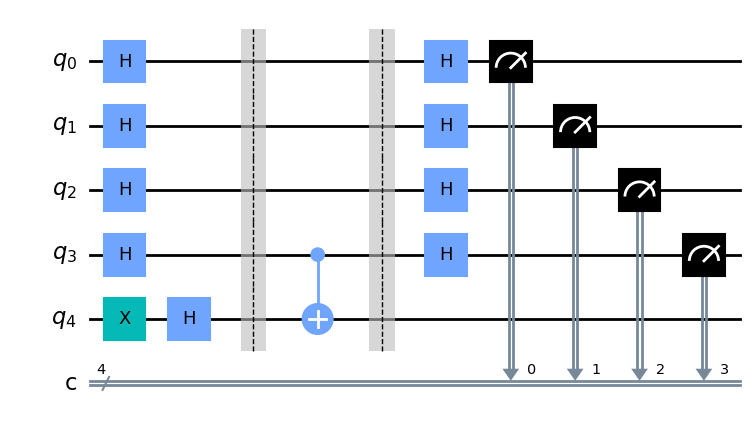

In [6]:
import random
from qiskit import QuantumCircuit, execute, Aer

dj_circuit = QuantumCircuit(5, 4)

dj_circuit.x(4)

dj_circuit.h(range(5))

dj_circuit.compose(oraclej(4), inplace=True)

dj_circuit.h(range(4))
dj_circuit.measure(range(4), range(4))
dj_circuit.draw(output='mpl')

In [7]:
job = execute(dj_circuit, Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts()
print(counts)

{'1000': 10000}


<a id="task5"></a>
<h3>Task 5</h3>

Write two functions `balanced(n)` and `constant(n)` to randomly generate quantum circuits with $n+1$ qubits that implement a function $ f : \{0, 1\}^n \rightarrow \{0, 1\} $ such that $f$ is either constant or balanced. 

Note that qubit $n$ is the output qubit.

In [8]:
import random
from qiskit import QuantumCircuit, execute, Aer

#f(x)=0 if first qubit is 0, if x_1=0
#f(x)=1 if first qubit is 1, if x_1=1
def balanced(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    
    circuit.cx(0,n)
    
    circuit.barrier()
    return circuit
    
#f(x)=0    
def constant(n):
    circuit = QuantumCircuit(n+1)
    circuit.barrier()
    
    #do nothing

    circuit.barrier()
    return circuit

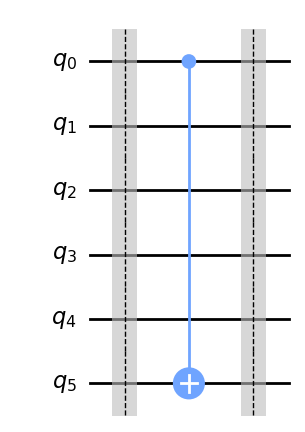

In [9]:
n=5
balanced(n).draw(output='mpl')

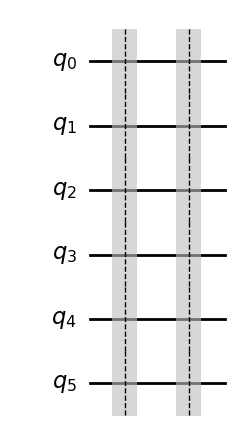

In [10]:
n=5
constant(n).draw(output='mpl')